In [1]:
from Wind.Private.DBConfig import mongoconnection
from pymongo import MongoClient
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
client = MongoClient(mongoconnection.server)
db = client[mongoconnection.db]
db.authenticate(mongoconnection.user, password=mongoconnection.passwd)
col = db[mongoconnection.col]


In [3]:
def find_exp(query):
    return col.find_one(query)

def count_exp(query):
    print col.count(query)
    
    
def compare_exp(lexp):
    
    fig = plt.figure(figsize=(16, 10), dpi=100)

    axes = fig.add_subplot(1, 1, 1)

    for exp in lexp:
        data = np.array(exp['result'])
        axes.plot(data[:,0], data[:,1])


In [4]:
query1= {'status':'done', 
                #'data.lag':12, 
                #'data.dataset':1, 
                #'data.vars': [0,1,2,3],
                #'arch.neurons': 32, 
                'arch.drop':0.5,
                #'arch.rnn':'GRU',
                #'arch.bidirectional':False,
                #'arch.activation':'tanh'
               }

In [5]:
count_exp(query1)

10


In [67]:
query2= {'status':'done', 
                'data.lag':12, 
                'data.dataset':1, 
                'data.vars': [0,1,2,3,4,5],
                'arch.neurons': 32, 
                'arch.drop':0.05,
                'arch.rnn':'GRU',
                'arch.bidirectional':False,
                'arch.activation':'tanh'
               }

In [68]:
count_exp(query2)

1


In [69]:
res1= find_exp(query1)
res2= find_exp(query2)
#print res1['arch']

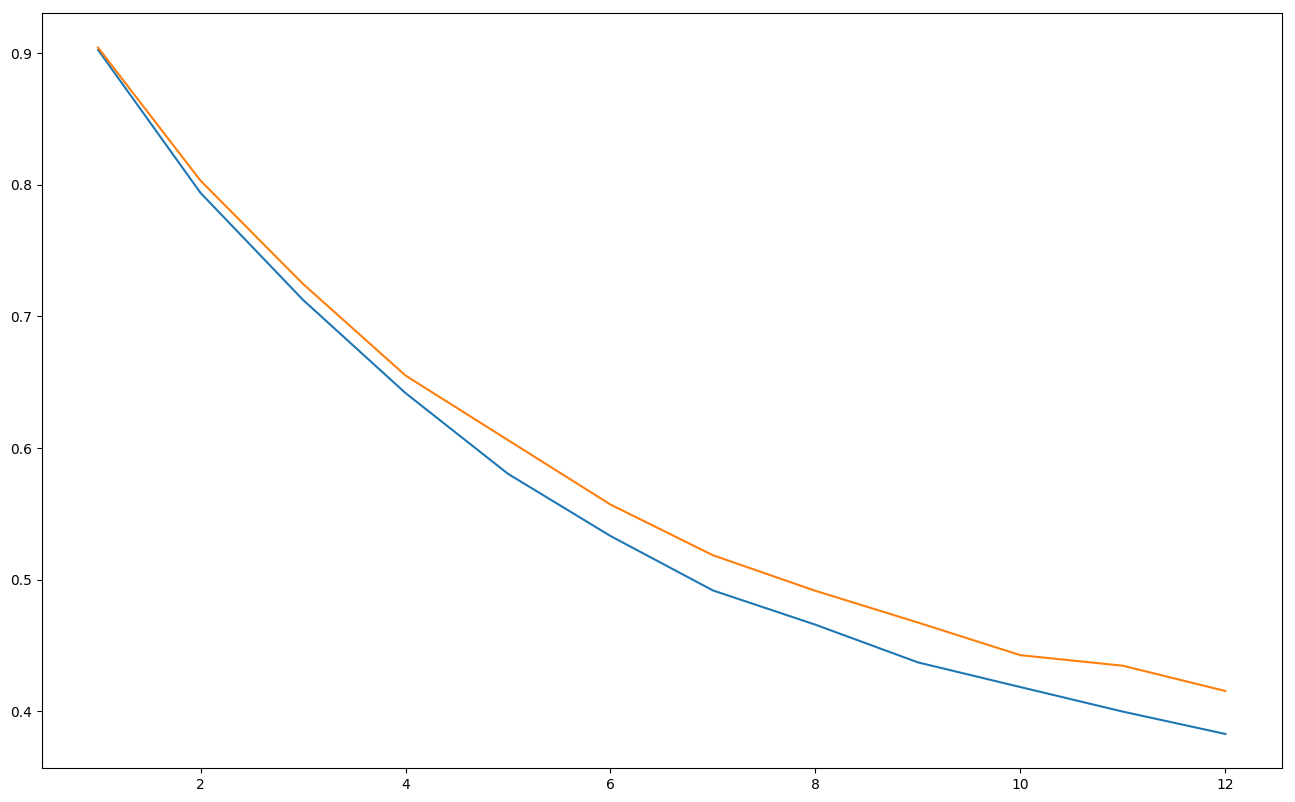

In [70]:
compare_exp([res1, res2])